# Graphe de causalité  [Partie 1 - Structure, modèle et  intervention]

**Définition d'un graphe de causalité**  

Un **graphe de causalité** est un graphe orienté et acyclique, souvent appelé **DAG (Directed Acyclic Graph)**, utilisé pour représenter les relations causales entre un ensemble de variables.  

Il est défini par :  
1. Un ensemble fini de nœuds $ V $, où chaque nœud $ v \in V $ représente une variable aléatoire.  
2. Un ensemble d’arêtes orientées $ E \subseteq V \times V $, où chaque arête $(v_i, v_j) \in E$ indique que $ v_i $ est une **cause directe** de $ v_j $.  

Un graphe de causalité respecte les propriétés suivantes :  
- **Acyclicité** : Le graphe ne contient pas de cycles orientés. En effet, un cycle impliquerait qu’un événement $ A $ cause $ B $, $ B $ cause $ C $, et $ C $ cause $ A $, ce qui contredit la notion de causalité unidirectionnelle.  
- **Orientation** : Les arêtes sont orientées pour indiquer la direction des relations causales, permettant de distinguer clairement une cause d’un effet.  

---

**Propriétés fondamentales**  

1. **Relations de dépendance et causalité directe** :  
    - Une arête $ v_i \to v_j $ représente une relation de **causalité directe** entre $ v_i $ et $ v_j $, c'est-à-dire que $ v_i $ influence directement $ v_j $, sans intermédiaire.  
    - Attention : toutes les relations de dépendance entre variables ne sont pas forcément représentées par des arêtes dans le graphe. Certaines dépendances peuvent être **induites** par les relations causales directes (voir point suivant).  

2. **Indépendance conditionnelle** :  
    - Un graphe de causalité encode des relations d’**indépendance conditionnelle** entre variables, selon le critère de séparation en graphe dirigé, ou **d-séparation**.  
    - Par exemple, si $ A \to B \to C $, alors $ A $ et $ C $ sont indépendants conditionnellement à $ B $. Cela signifie que la dépendance entre $ A $ et $ C $ est induite par leur lien commun via $ B $.  

3. **Interprétation probabiliste** :  
    - Si un graphe causal est associé à une distribution de probabilité jointe $ P $, alors le graphe respecte le principe de **factorisation**. Cela signifie que la probabilité jointe peut être écrite comme le produit des probabilités conditionnelles des nœuds, en fonction de leurs parents dans le graphe :  
      $$
      P(V) = \prod_{v \in V} P(v \mid \text{Parents}(v)).
      $$  

---

**Exemple d’application**  

Considérons trois variables $ A $, $ B $, $ C $ avec les relations causales suivantes : $ A \to B $ et $ B \to C $.  
- Ici, $ A $ cause directement $ B $, et $ B $ cause directement $ C $.  
- $ A $ influence $ C $, mais de manière **indirecte** via $ B $.  
- Selon la d-séparation, $ A $ et $ C $ sont conditionnellement indépendants sachant $ B $.  

---

## Les partterns

Il existe des **patterns** pour décrire des configurations courantes dans les graphes causaux. En voici deux exemples :  

1. **La chaîne** :  
   $
   X \to Z \to Y
   $ 
   Dans cette configuration :  
   - $X $ et $Y $ sont **indépendants** dans la distribution jointe (marginale), car ils ne sont pas connectés directement.  
   - Cependant, $X $ et $Y $ deviennent **conditionnellement dépendants** lorsqu'on conditionne sur $Z $.  
   - En termes d’indépendance conditionnelle, cela se traduit par :  
     $
     X \perp\!\!\!\perp Y \quad \text{mais} \quad X \not\!\perp\!\!\!\perp Y \mid Z
     $ 

2. **La fourchette** (*fork* en anglais) :  
   $
   X \gets Z \to Y
   $ 
   Dans cette configuration :  
   - $X $ et $Y $ sont **dépendants** dans la distribution jointe (marginale), car $Z $ est une cause commune des deux.  
   - Cependant, $X $ et $Y $ deviennent **indépendants** lorsqu'on conditionne sur $Z $.  
   - En termes d’indépendance conditionnelle, cela se traduit par :  
     $
     X \not\!\perp\!\!\!\perp Y \quad \text{mais} \quad X \perp\!\!\!\perp Y \mid Z
     $ 

3. **Le "collider"**  
    Un motif de **collision** se présente sous la forme suivante :  
    $$
    X \to Z \gets Y
    $$  

    Dans cette configuration :  
    - $ Z $ est une variable qui reçoit une influence causale à la fois de $ X $ et de $ Y $.  
    - Contrairement aux autres motifs comme la chaîne ou la fourchette, **$ X $ et $ Y $ sont indépendants sauf si on conditionne sur $ Z $** ou sur une variable qui dépend de $ Z $.  

    **Propriétés mathématiques** :  
    1. Marginalement : $ X $ et $ Y $ sont **indépendants**.  
    $$
    X \perp\!\!\!\perp Y
    $$  
    2. Conditionnellement sur $ Z $ : $ X $ et $ Y $ deviennent **dépendants**.  
    $$
    X \not\!\perp\!\!\!\perp Y \mid Z
    $$  

### Exemples

#### 1. **La chaîne : $ X \to Z \to Y $**  
**Exemple : Propagation de la température**  
- **Contexte** :  
  $ X $ représente la température extérieure.  
  $ Z $ représente la température d’une pièce.  
  $ Y $ représente le confort thermique ressenti par une personne.  
- **Interprétation** :  
  - La température extérieure ($ X $) influence la température de la pièce ($ Z $), qui à son tour influence le confort ressenti ($ Y $).  
  - Marginalement, $ X $ et $ Y $ ne sont pas directement liés : si vous ne connaissez pas $ Z $, vous ne pouvez pas prédire $ Y $ à partir de $ X $.  
  - Cependant, si vous connaissez $ Z $ (la température de la pièce), $ X $ devient conditionnellement dépendant de $ Y $.  

**Propriétés** :  
$$
X \perp\!\!\!\perp Y \quad \text{mais} \quad X \not\!\perp\!\!\!\perp Y \mid Z
$$  

#### 2. **La fourchette : $ X \gets Z \to Y $**  
**Exemple : Génétique et traits physiques**  
- **Contexte** :  
  $ X $ représente la couleur des cheveux.  
  $ Y $ représente la couleur des yeux.  
  $ Z $ représente un gène particulier qui influence à la fois la couleur des cheveux et la couleur des yeux.  
- **Interprétation** :  
  - $ X $ et $ Y $ sont dépendants dans la distribution jointe (par exemple, les personnes avec des cheveux foncés ont souvent les yeux foncés).  
  - Si vous connaissez $ Z $ (le gène responsable), cette dépendance disparaît, car $ Z $ explique à lui seul les deux traits.  


### 3. **Le collider : $ X \to Z \gets Y $**  
**Exemple : Détection d'une maladie via des symptômes** 

- **Contexte** :  
  - $ X $ : Une personne a une grippe.  
  - $ Y $ : Une personne a une allergie.  
  - $ Z $ : La personne présente un symptôme commun, comme un nez qui coule.  

- **Interprétation** :  
  - La grippe ($ X $) et l’allergie ($ Y $) peuvent toutes deux causer un nez qui coule ($ Z $).  
  - Si vous ne tenez pas compte du fait que la personne a le nez qui coule ($ Z $), la grippe ($ X $) et l’allergie ($ Y $) sont indépendantes : l’un ne vous informe pas sur l’autre.  
  - Cependant, si vous savez que la personne a le nez qui coule ($ Z $), alors les deux causes potentielles ($ X $ et $ Y $) deviennent dépendantes. En effet, si vous découvrez que la personne a la grippe ($ X $), cela diminue la probabilité qu’elle ait également une allergie ($ Y $), et vice versa.  

**Propriétés** :  
$$
X \not\!\perp\!\!\!\perp Y \quad \text{mais} \quad X \perp\!\!\!\perp Y \mid Z
$$


---
## Vocabulaire

Le symbole **$ \perp\!\!\!\perp $** (ou parfois simplement $ \perp $) est utilisé en mathématiques et en statistiques pour représenter **l'indépendance stochastique** ou **l'indépendance statistique** entre deux variables aléatoires.

### **Définition**  
Deux variables aléatoires $ X $ et $ Y $ sont dites **indépendantes** (notation : $ X \perp\!\!\!\perp Y $) si la connaissance de $ Y $ n'apporte aucune information sur $ X $, et vice versa.  
En termes probabilistes :  
$$
X \perp\!\!\!\perp Y \quad \Longleftrightarrow \quad P(X, Y) = P(X) \cdot P(Y)
$$
où $ P(X, Y) $ est la probabilité conjointe, $ P(X) $ et $ P(Y) $ sont les probabilités marginales.

### **Indépendance conditionnelle**  
Une extension importante est **l'indépendance conditionnelle**, qui s'écrit également avec ce symbole :  
$$
X \perp\!\!\!\perp Y \mid Z
$$
Cela signifie que $ X $ et $ Y $ sont indépendants **conditionnellement à une troisième variable $ Z $**.  
En termes probabilistes :  
$$
X \perp\!\!\!\perp Y \mid Z \quad \Longleftrightarrow \quad P(X, Y \mid Z) = P(X \mid Z) \cdot P(Y \mid Z)
$$

### **Interprétation intuitive**  
1. **Indépendance totale ($ X \perp\!\!\!\perp Y $)** : $ X $ et $ Y $ n'ont aucune relation entre eux.  
   - Exemple : La couleur des murs d'une pièce et le prix d'une action en bourse.  
2. **Indépendance conditionnelle ($ X \perp\!\!\!\perp Y \mid Z $)** : $ X $ et $ Y $ sont dépendants, mais une fois que vous connaissez $ Z $, cette dépendance disparaît.  
   - Exemple : La couleur des cheveux ($ X $) et la couleur des yeux ($ Y $) dépendent d'un gène ($ Z $). Si vous connaissez $ Z $, $ X $ et $ Y $ deviennent indépendants.

### Utilisation en graphes causaux  
Le symbole $ \perp\!\!\!\perp $ est central pour exprimer les propriétés d'indépendance dans les **DAGs (Graphes Dirigés Acycliques)**, où il permet de formaliser les relations entre variables via le critère de **d-séparation**.  


## Exemple d'un collider

In [23]:
import numpy as np
import pandas as pd

talent = pd.Series(np.random.normal(0, 1, 1000), name="talent")
look = pd.Series(np.random.normal(0, 1, 1000), name="look")
df = pd.concat([talent, look], axis=1)
df.corr()

,talent,look
talent,1.000000,0.040981
look,0.040981,1.000000


Ici les deux variables sont complément indépendantes 

In [ ]:
x = talent + look
job = 1*(x > x.quantile(0.75))
df["job"] = job

In [32]:
df[df.job == 1].corr()

,talent,look,job
talent,1.00000,-0.60478,NaN
look,-0.60478,1.00000,NaN
job,NaN,NaN,NaN


Par le biais de x avec une quantile de la somme de nos deux var aléa, nous obtenons une corrélation lorsque que nous conditionnons talent et look par rapport à job.

Voici une viz pour comprendre le phénomène:

<Axes: xlabel='talent', ylabel='look'>

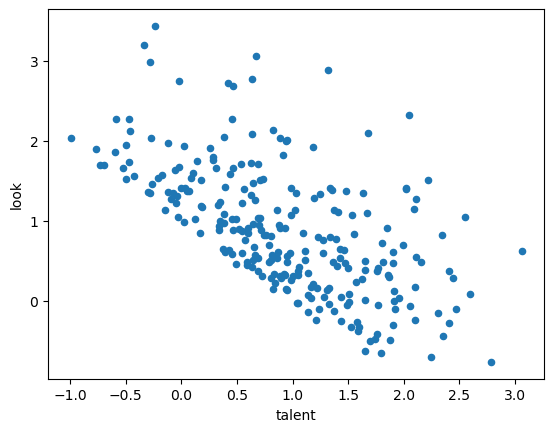

In [34]:
df[df.job == 1].plot.scatter(x="talent", y="look")

## La **d-séparation**

La **d-séparation** (ou **séparation directionnelle**) est un concept central dans la théorie des graphes causaux. Elle permet de déterminer si deux ensembles de variables dans un graphe causal sont **indépendants conditionnellement** à un autre ensemble de variables. C’est une règle formelle pour raisonner sur les relations d’indépendance statistique dans un **graphe dirigé acyclique** (DAG).

---

### **1. Définition intuitive**
La d-séparation est utilisée pour répondre à la question suivante :  
> "Dans un DAG, connaissant certaines variables, est-ce que deux autres variables (ou ensembles de variables) sont statistiquement indépendants ?"

Deux variables $ X $ et $ Y $ sont **d-séparées** par un ensemble de variables $ Z $ (notation : $ X \perp\!\!\!\perp Y \mid Z $) si **tous les chemins reliant $ X $ et $ Y $ sont bloqués** par $ Z $.

---

### **2. Règles pour bloquer un chemin**
Un **chemin** dans un graphe causal peut être bloqué par $ Z $ selon trois types de structures fondamentales (ou motifs) :

#### a) **Chaîne : $ X \to Z \to Y $**  
- Si $ Z $ appartient à l’ensemble de conditionnement $ Z $, alors le chemin est bloqué.  
- Exemple : Si la température extérieure ($ X $) affecte la température intérieure ($ Z $), qui affecte le confort ($ Y $), conditionner sur $ Z $ (température intérieure) bloque ce chemin.

#### b) **Fourchette : $ X \gets Z \to Y $**  
- Si $ Z $ appartient à l’ensemble de conditionnement $ Z $, alors le chemin est bloqué.  
- Exemple : Si $ Z $ est une cause commune (par exemple, le gène responsable de la couleur des cheveux et des yeux), conditionner sur $ Z $ coupe le lien entre $ X $ (cheveux) et $ Y $ (yeux).

#### c) **Collider : $ X \to Z \gets Y $**  
- Si $ Z $ **n’appartient pas** à l’ensemble de conditionnement, alors le chemin est bloqué.  
- Si $ Z $ ou l’un de ses descendants est dans l’ensemble de conditionnement, alors le chemin devient actif.  
- Exemple : Si $ Z $ est un symptôme (nez qui coule) causé par deux maladies indépendantes ($ X $ : grippe, $ Y $ : allergie), conditionner sur $ Z $ (ou sur ses conséquences) introduit une dépendance entre $ X $ et $ Y $.

---

### **3. Formalisation de la d-séparation**
Deux ensembles de variables $ X $ et $ Y $ sont **d-séparés** par un ensemble $ Z $ si tous les chemins reliant $ X $ et $ Y $ sont bloqués par $ Z $.  

- Un **chemin causal** est **bloqué** si :
  - $ Z $ contient une variable intermédiaire dans une chaîne ($ X \to Z \to Y $) ou une fourchette ($ X \gets Z \to Y $).  
  - $ Z $ **ne contient pas** une variable dans un collider ($ X \to Z \gets Y $), sauf si un descendant de cette variable est dans $ Z $.

---

### **4. Exemple concret**
#### Graphe causal :  
$$
X \to Z \to Y \quad \text{et} \quad X \to W \gets Y
$$

1. **Indépendance marginale ($ Z = \emptyset $)** :  
   - $ X $ et $ Y $ sont connectés par deux chemins :  
     - $ X \to Z \to Y $ (chaîne).  
     - $ X \to W \gets Y $ (collider, bloqué si $ W $ n’est pas conditionné).  
   - Si on ne conditionne sur aucune variable, $ X $ et $ Y $ sont dépendants.  

2. **Conditionnement sur $ Z $ ($ Z = \{Z\} $)** :  
   - Le chemin $ X \to Z \to Y $ est bloqué.  
   - Le chemin $ X \to W \gets Y $ reste bloqué (par le collider).  
   - Donc, $ X \perp\!\!\!\perp Y \mid Z $.  

3. **Conditionnement sur $ W $ ($ Z = \{W\} $)** :  
   - Le chemin $ X \to W \gets Y $ devient actif (le collider est débloqué).  
   - Le chemin $ X \to Z \to Y $ reste actif.  
   - Donc, $ X \not\!\perp\!\!\!\perp Y \mid W $.

---

### **5. Utilité de la d-séparation**
- Identifier les relations d'indépendance dans un graphe causal.  
- Vérifier si un modèle causal est compatible avec les données statistiques.  
- Comprendre comment conditionner les variables pour bloquer ou activer des chemins.


---

## Les interventions

![test](./imgs/example_intervention.png)

Comme on peut le voir nous pouvons attribuer à la variable X une valeur, donc nous faisons ce qu'on appele une intervention qui consiste à étudier Y enfonction de Z et x conditionné ! 